In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'
A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']
n_features = A.shape[0]
n_patients = A.shape[1]
print('%d patients' % n_patients)
print('%d features' % n_features)

216 patients
4000 features


In [2]:
# implement the randomized svd
def randomized_svd(A, k):
    m, n = A.shape
    Omega = np.random.randn(n, k)
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.transpose() @ A
    Uhat, S, V = np.linalg.svd(B, full_matrices=False)
    U = Q @ Uhat
    return U, S, V



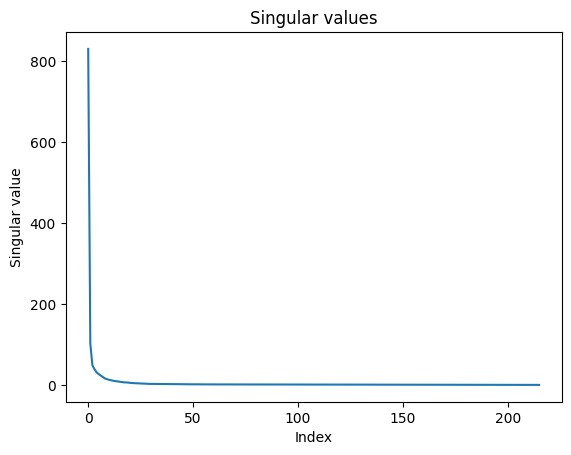

In [3]:
# perform PCA on the data
U, S, V = np.linalg.svd(A, full_matrices=False)

#plot the singular values
plt.figure()
plt.plot(S)
plt.title('Singular values')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.savefig('singular_values.png')
plt.show()

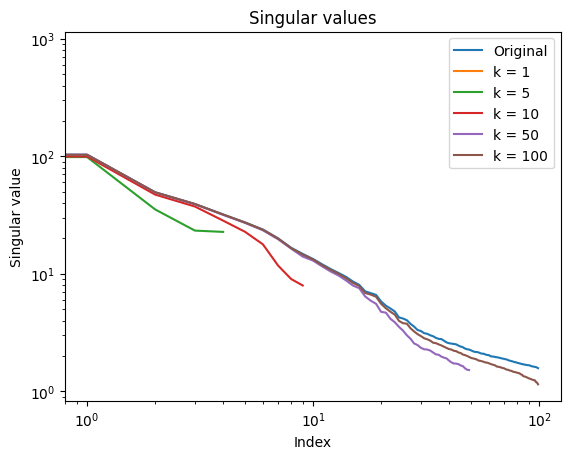

In [4]:
k_vals = [1, 5, 10, 50, 100]

sing_vals_rand = []
for k in k_vals:
    u, s, v = randomized_svd(A, k)
    sing_vals_rand.append(s)

#plot the singular values for randomized svd together with the original
plt.figure()
plt.loglog(S[:100], label='Original')
for i in range(len(k_vals)):
    plt.loglog(sing_vals_rand[i], label='k = %d' % k_vals[i])
plt.title('Singular values')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.legend()
plt.show()
    

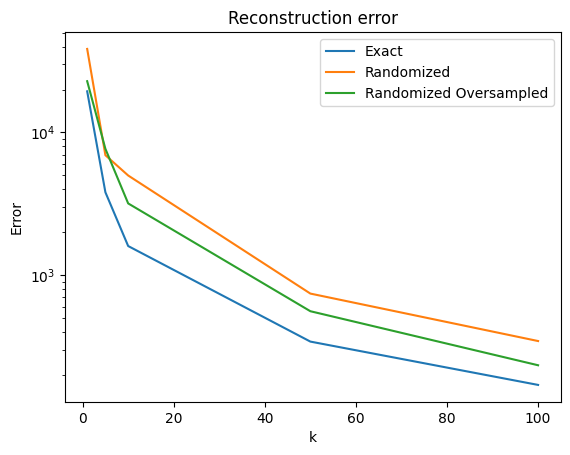

In [5]:
# PCA with exact SVD, for k=[1,5,10,50,100]
error_exact = []
error_rand = []
error_rand_ovsamp = []

for k in k_vals:
    # compute the projection matrix
    P = U[:, :k] @ U[:, :k].transpose()
    # project the data
    A_proj = P @ A
    # compute the error
    error_exact.append(np.linalg.norm(A - A_proj, ord='fro')**2)
    
for k in k_vals:
    u, _, _ = randomized_svd(A, k)
    # compute the projection matrix
    P = u[:, :k] @ u[:, :k].transpose()
    # project the data
    A_proj = P @ A
    # compute the error
    error_rand.append(np.linalg.norm(A - A_proj, ord='fro')**2)
    
for k in k_vals:
    u, _, _ = randomized_svd(A, int(k*1.5))
    # compute the projection matrix
    P = u[:, :k] @ u[:, :k].transpose()
    # project the data
    A_proj = P @ A
    # compute the error
    error_rand_ovsamp.append(np.linalg.norm(A - A_proj, ord='fro')**2)
    
plt.figure()
plt.semilogy(k_vals, error_exact, label='Exact')
plt.semilogy(k_vals, error_rand, label='Randomized')
plt.semilogy(k_vals, error_rand_ovsamp, label='Randomized Oversampled')
plt.title('Reconstruction error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

In [16]:
patients_cancer = grp == 'Cancer'

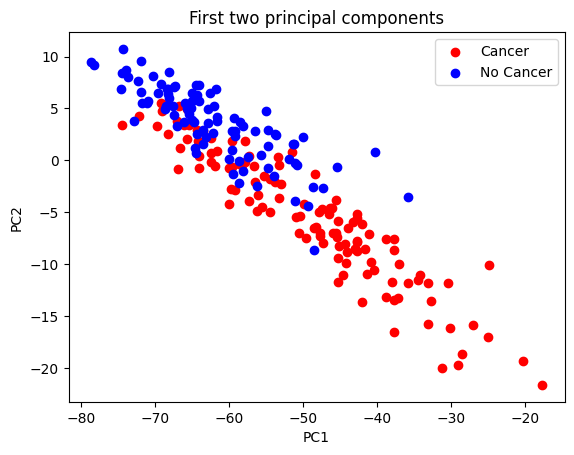

In [19]:
c1 = U[:, 0] @ A
c2 = U[:, 1] @ A

# make a scatter plot of the first two principal components with exact SVD, plotting in red patients in the group ”cancer” and in blue the patients in the remaining group
plt.figure()
plt.scatter(c1[grp=='Cancer'], c2[grp=='Cancer'], c='r', label='Cancer')
plt.scatter(c1[grp!='Cancer'], c2[grp!='Cancer'], c='b', label='No Cancer')
plt.title('First two principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


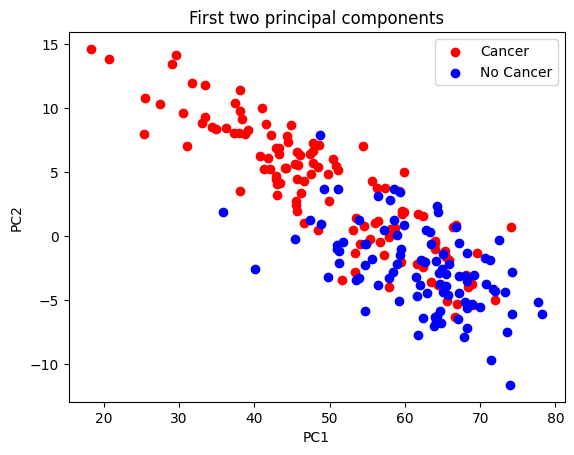

In [20]:
u,_,_ = randomized_svd(A, 2)
c1 = u[:, 0] @ A
c2 = u[:, 1] @ A

# make a scatter plot of the first two principal components with exact SVD, plotting in red patients in the group ”cancer” and in blue the patients in the remaining group
plt.figure()
plt.scatter(c1[grp=='Cancer'], c2[grp=='Cancer'], c='r', label='Cancer')
plt.scatter(c1[grp!='Cancer'], c2[grp!='Cancer'], c='b', label='No Cancer')
plt.title('First two principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [21]:
import time
# compute the exact SVD
start = time.time()
U, S, V = np.linalg.svd(A, full_matrices=False)
print('Exact SVD took %f seconds' % (time.time() - start))

start = time.time()
u, s, v = randomized_svd(A, 2)
print('Randomized SVD took %f seconds' % (time.time() - start))



Exact SVD took 0.141431 seconds
Randomized SVD took 0.002053 seconds


# Exercise 2

In [131]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

In [132]:
X = np.genfromtxt('X.dat')
y = np.genfromtxt('y.dat')

In [133]:
X.shape, y.shape

((10000, 46), (10000,))

In [134]:
# Defining the function f(x)
def loss_fn(w, x, y):
    return jnp.mean(jnp.log(1 + jnp.exp(-y * jnp.dot(x, w))))

loss_jit = jax.jit(loss_fn)
grad_fn = jax.grad(loss_fn, argnums=0)
grad_fn = jax.jit(grad_fn)

1.4722924
1.5681576
1.5946605
1.7613244
2.225075
2.2266352
2.242981
2.3386483
1.7545351
1.7545353
1.7865396
2.9017222
3.2227004
3.2227817
3.3266113
4.9489527
4.075203
4.075417
3.506123
3.5147047
3.5147257
3.5161893
2.9962788
3.3127272
3.312948
2.2818968
2.4995224
2.4997342
2.4997342
2.8573906
2.6860754
2.468075
2.46911
3.4781861
3.8741386
4.2291217
4.2291226
4.229254
4.229254
3.4998202
3.4998202
2.6947956
2.7438252
3.0960636
3.0960677
3.0960588
3.4083304
3.40833
3.40833
3.4023898
3.4023898
3.3950171
3.3960342
3.8523347
3.88688
4.4937754
4.6684637
4.6684637
4.668435
4.668437
4.569328
4.569331
3.418582
3.418648
3.7717054
3.8869617
3.88905
3.0308561
3.1904073
3.1922731
3.1922488
3.1922488
3.9179604
3.9179604
3.8014538
3.8014538
3.8019679
3.8147562
3.876035
3.8844674
3.9113054
4.1288695
5.060521
5.060521
5.058792
5.058792
4.548203
4.5184684
3.8293428
3.828354
3.6434116
3.654285
3.654286
3.6483936
3.020247
3.020247
3.0457993
2.7861006
3.340982
3.3903046
2.9364362
2.9364362
2.9364362
3.21952

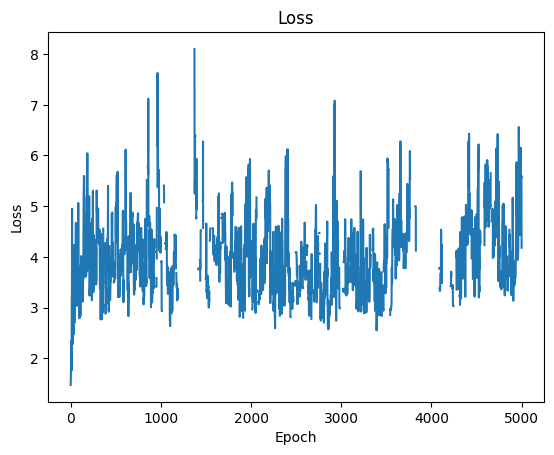

In [178]:
# implement the SGD algorithm, with constant learning rate
batch_size = 1
lr = 0.5
n_epochs = 5000

convergence_history = []

# initialize the weights
w = jnp.array([0.0 for i in range(X.shape[1])])

for i in range(n_epochs):
    # randomly sample a batch
    idx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[idx]
    y_batch = y[idx]
    
    grad = grad_fn(w, X_batch, y_batch)
    w = w - lr * grad
    convergence_history.append(loss_jit(w, X, y))
    print(loss_jit(w, X, y))

plt.figure()
plt.plot(convergence_history)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

1.4032651
1.4837339
2.547497
2.5719714
2.5733073
2.1432633
1.7643546
1.8194058
1.8198097
2.0216393
2.0229895
2.0234134
2.0234196
2.0236027
1.9986378
1.9178011
1.6287007
1.6287045
2.1884902
1.9371197
1.937155
1.9365704
1.9387095
1.9386951
1.9387072
2.466898
2.4669175
2.4669123
2.4669287
2.470771
2.470771
2.7890043
2.7890036
2.567066
2.5672636
2.9480588
3.618846
3.6195667
3.0289826
3.0289826
3.02895
4.187511
3.7919827
3.7931738
3.7953937
3.8222296
3.7787647
3.7792892
3.7793326
3.7794366
3.7798738
3.816537
3.914608
3.914608
3.9318016
3.5759358
3.5759358
4.9806614
4.980667
5.240928
5.2413583
3.969961
3.7568545
4.5554366
5.455494
5.4556103
5.455612
5.455612
5.455612
5.4556184
5.455636
4.2984605
4.7486625
4.3771133
4.3771133
3.5962734
3.607583
4.949771
4.949737
4.949737
5.030016
5.0309052
3.0627248
3.0629907
3.06299
2.7591562
2.7591608
2.7591608
2.7591605
2.7513342
2.771097
2.79545
2.7954915
3.112921
3.1979225
3.1979225
3.2629988
3.2631178
3.2631874
3.2631874
3.2631729
2.1314616
2.129205
2.2

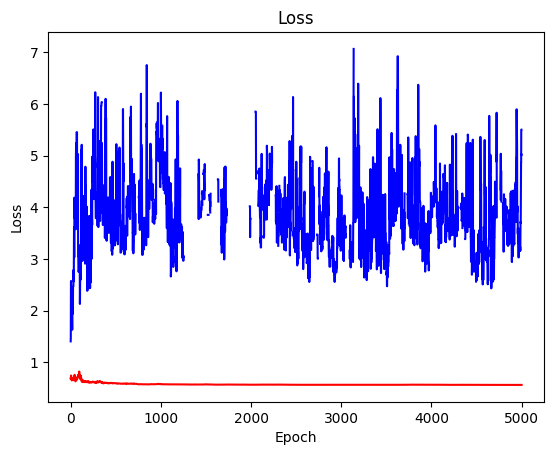

In [179]:
# implement the SGD algorithm, with constant learning rate
batch_size = 1
lr_0 = 0.5
n_epochs = 5000

convergence_history = []
convergence_history_update_lr = []
update_lr = True
# initialize the weights
w = jnp.array([0.0 for i in range(X.shape[1])])

for i in range(n_epochs):
    
    lr = lr_0
    # randomly sample a batch
    idx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[idx]
    y_batch = y[idx]
    
    grad = grad_fn(w, X_batch, y_batch)
    w = w - lr * grad
    convergence_history.append(loss_jit(w, X, y))
    print(loss_jit(w, X, y))

w = jnp.array([0.0 for i in range(X.shape[1])])
lr_0 = 0.05
for i in range(n_epochs):
    
    lr = lr_0 / (1 + i/100)
    # randomly sample a batch
    idx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[idx]
    y_batch = y[idx]
    
    grad = grad_fn(w, X_batch, y_batch)
    w = w - lr * grad
    convergence_history_update_lr.append(loss_jit(w, X, y))
    print(loss_jit(w, X, y))

plt.figure()
plt.plot(convergence_history, label='Constant learning rate', c='b')
plt.plot(convergence_history_update_lr, label='Update learning rate', c='r')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()